In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn.functional as F

In [ ]:
file_path = r"C:\Users\Essam\Desktop\DL Assignment\Age_Images"

age = []
gender = []
race = []
img_path = []

# Extract age, gender, race, and image path
for file in os.listdir(file_path):
    parts = file.split('_')
    age.append(int(parts[0]))
    gender.append(parts[1])
    race.append(parts[2])
    img_path.append(file)

# Print sample results for verification
print("Age:", age[:5])
print("Gender:", gender[:5])
print("Race:", race[:5])
print("Image Paths:", img_path[:5])


Age: [10, 10, 10, 10, 10]
Gender: ['0', '0', '0', '0', '0']
Race: ['0', '0', '0', '0', '0']
Image Paths: ['10_0_0_20161220222308131.jpg.chip.jpg', '10_0_0_20170103200329407.jpg.chip.jpg', '10_0_0_20170103200522151.jpg.chip.jpg', '10_0_0_20170103233459275.jpg.chip.jpg', '10_0_0_20170104013211746.jpg.chip.jpg']


In [3]:
df = pd.DataFrame({
    'age': age,
    'gender': gender,
    'race': race,
    'img_path': img_path
})
df = df[(df['age'] >= 10) & (df['age'] <= 90)]

In [4]:
df

,age,gender,race,img_path
0,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg
1,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg
2,10,0,0,10_0_0_20170103200522151.jpg.chip.jpg
3,10,0,0,10_0_0_20170103233459275.jpg.chip.jpg
4,10,0,0,10_0_0_20170104013211746.jpg.chip.jpg
...,...,...,...,...
20555,90,1,1,90_1_1_20170120220828835.jpg.chip.jpg
20556,90,1,2,90_1_2_20170110183630709.jpg.chip.jpg
20557,90,1,2,90_1_2_20170110183708997.jpg.chip.jpg
20558,90,1,2,90_1_2_20170111205444634.jpg.chip.jpg


In [5]:
df.isnull().sum()

age         0
gender      0
race        0
img_path    0
dtype: int64

In [6]:
df['gender'].unique()

array(['0', '1', '3'], dtype=object)

In [7]:
df['race'].unique()

array(['0', '1', '2', '3', '4', '20170116174525125.jpg.chip.jpg',
       '20170109142408075.jpg.chip.jpg', '20170109150557335.jpg.chip.jpg'],
      dtype=object)

In [8]:
print((df['race'] == '20170116174525125.jpg.chip.jpg').sum())
print((df['race'] == '20170109142408075.jpg.chip.jpg').sum())
print((df['race'] == '20170109150557335.jpg.chip.jpg').sum())
print((df['race'] == '0').sum())
print((df['race'] == '1').sum())
print((df['race'] == '2').sum())
print((df['race'] == '3').sum())
print((df['race'] == '4').sum())

1
1
2
8919
4365
2482
3482
1308


In [ ]:
# Filter out rows with specific 'race' values
exclude_values = [
    '20170116174525125.jpg.chip.jpg',
    '20170109142408075.jpg.chip.jpg',
    '20170109150557335.jpg.chip.jpg'
]

# Remove rows with the specified 'race' values
df = df[~df['race'].isin(exclude_values)]

print(f"Remaining rows: {len(df)}")

Remaining rows: 20556


In [10]:
df

,age,gender,race,img_path
0,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg
1,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg
2,10,0,0,10_0_0_20170103200522151.jpg.chip.jpg
3,10,0,0,10_0_0_20170103233459275.jpg.chip.jpg
4,10,0,0,10_0_0_20170104013211746.jpg.chip.jpg
...,...,...,...,...
20555,90,1,1,90_1_1_20170120220828835.jpg.chip.jpg
20556,90,1,2,90_1_2_20170110183630709.jpg.chip.jpg
20557,90,1,2,90_1_2_20170110183708997.jpg.chip.jpg
20558,90,1,2,90_1_2_20170111205444634.jpg.chip.jpg


In [11]:
df['race'].unique()

array(['0', '1', '2', '3', '4'], dtype=object)

In [12]:
df['gender'].unique()

array(['0', '1'], dtype=object)

C:\Users\Essam\AppData\Local\Temp\ipykernel_15152\3161908103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['img_path'] = df['img_path'].apply(lambda x: os.path.join(base_dir, x))
C:\Users\Essam\AppData\Local\Temp\ipykernel_15152\3161908103.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples_per_race = df.groupby('race').apply(lambda x: x.sample(5, random_state=42)).reset_index(drop=True)


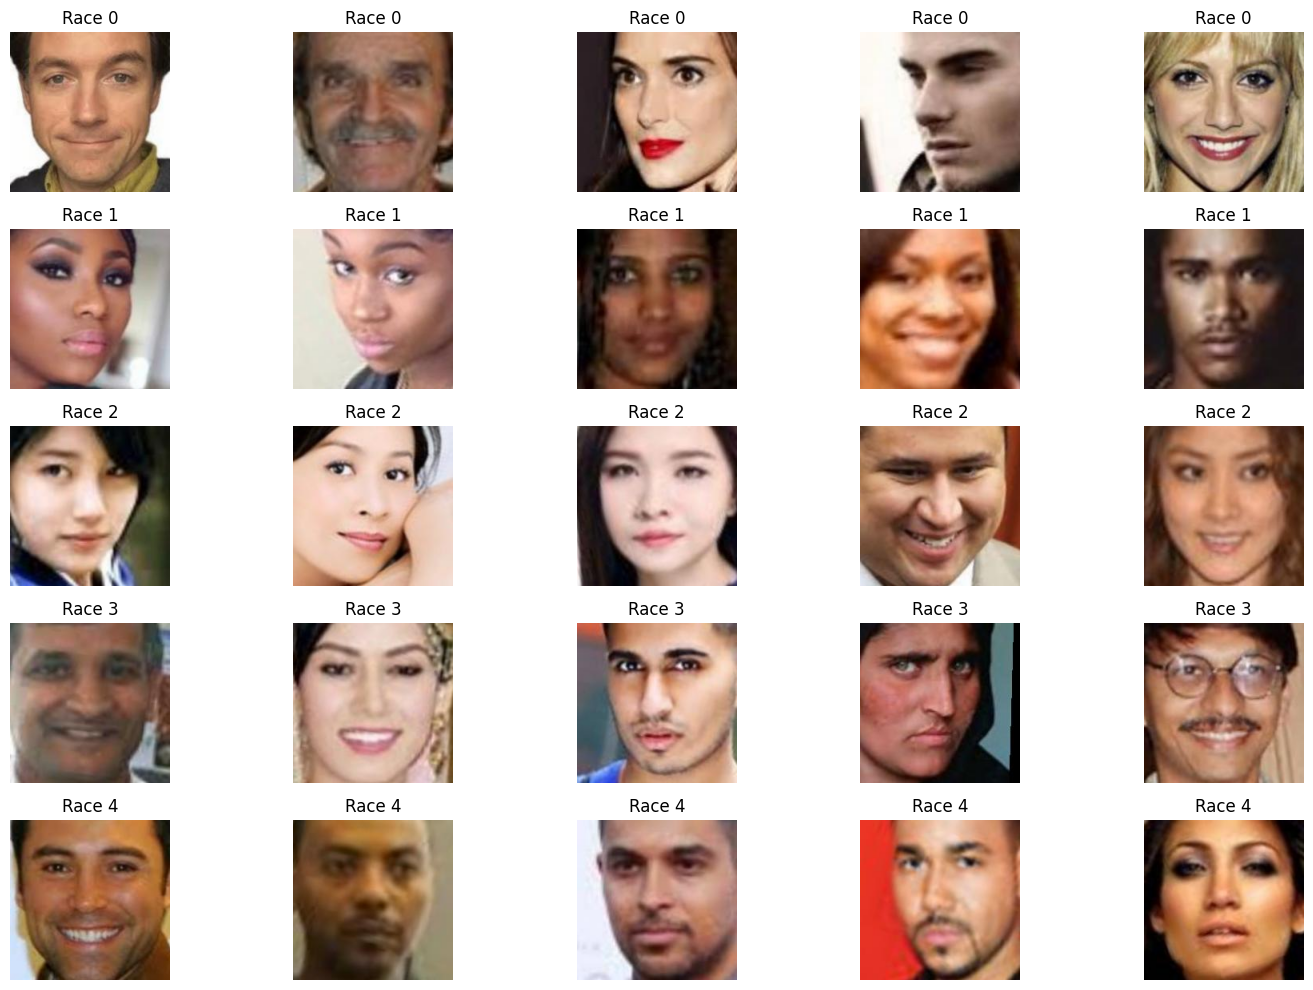

In [13]:
base_dir = r'C:\Users\Essam\Desktop\DL Assignment\Age_Images'
df['img_path'] = df['img_path'].apply(lambda x: os.path.join(base_dir, x))

samples_per_race = df.groupby('race').apply(lambda x: x.sample(5, random_state=42)).reset_index(drop=True)

fig, axes = plt.subplots(len(samples_per_race['race'].unique()), 5, figsize=(15, 10))

for i, (race, group) in enumerate(samples_per_race.groupby('race')):
    for j, img_path in enumerate(group['img_path']):
        img = plt.imread(img_path)
        ax = axes[i, j]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'Race {race}')
        
plt.tight_layout()
plt.show()


In [ ]:
# Shuffle and split data
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
train_df, temp_df = train_test_split(df_shuffled, test_size=0.2, random_state=42, stratify=df_shuffled['age'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['age'])

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class AgeDataset(Dataset):
    def __init__(self, dataframe, file_path, transform=None):
        self.dataframe = dataframe
        self.file_path = file_path
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Extract image, gender, race, and age
        img_name = os.path.join(self.file_path, self.dataframe.iloc[idx]['img_path'])
        gender = self.dataframe.iloc[idx]['gender']
        race = self.dataframe.iloc[idx]['race']
        age = self.dataframe.iloc[idx]['age']

        # Load and transform the image
        image = Image.open(img_name).convert("RGB")
        if self.transform:
            image = self.transform(image)
        
        # Encode categorical features
        gender = torch.tensor(int(gender), dtype=torch.float32)
        race = torch.tensor(int(race), dtype=torch.float32)
        age = torch.tensor(age, dtype=torch.float32)  # Target (age)
        
        # Return a dictionary
        return {
            "image": image,
            "gender": gender,
            "race": race,
            "label": age
        }


# Define image transforms
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


Using device: cuda


In [16]:
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [17]:
# Create Datasets
train_dataset = AgeDataset(train_df, file_path, transform=train_transforms)
val_dataset = AgeDataset(val_df, file_path, transform=val_test_transforms)
test_dataset = AgeDataset(test_df, file_path, transform=val_test_transforms)

In [18]:
# DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [19]:
# Example Usage
for batch in train_loader:
    features = batch  # 'batch' is a dictionary
    images, genders, races = features['image'], features['gender'], features['race']
    labels = features['label']
    
    # Move data to the device
    images, genders, races, labels = images.to(device), genders.to(device), races.to(device), labels.to(device)
    
    # Proceed with forward pass, loss calculation, and optimization


In [20]:
scaler = torch.cuda.amp.GradScaler()

In [21]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size, stride=stride, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Identity()

    def forward(self, x):
        shortcut = self.shortcut(x)
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))
        x = x + shortcut
        x = F.relu(x)
        return x

class AgePredictionModel(nn.Module):
    def __init__(self):
        super(AgePredictionModel, self).__init__()
        # Convolutional layers for image processing
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.block1 = ResidualBlock(32, 32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.block2 = ResidualBlock(64, 64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        self.block3 = ResidualBlock(128, 128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        self.block4 = ResidualBlock(256, 256)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(512)

        self.block5 = ResidualBlock(512, 512)
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layers for combined features
        self.fc_image = nn.Linear(512, 256)  # For image features
        self.fc_gender = nn.Linear(1, 16)    # For gender feature
        self.fc_race = nn.Linear(1, 16)      # For race feature
        self.fc_combined = nn.Linear(256 + 16 + 16, 128)  # Combine all features

        self.dropout = nn.Dropout(0.3)
        self.fc_output = nn.Linear(128, 1)  # Regression output for age prediction

    def forward(self, image, gender, race):
        # Process image input
        x = self.pool(F.relu(self.bn1(self.conv1(image))))
        x = self.block1(x)
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.block2(x)
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.block3(x)
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.block4(x)
        x = self.pool(F.relu(self.bn5(self.conv5(x))))
        x = self.block5(x)
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc_image(x))

        # Process gender and race features
        gender = F.relu(self.fc_gender(gender.unsqueeze(1)))  # Expand dimension for linear layer
        race = F.relu(self.fc_race(race.unsqueeze(1)))

        # Combine all features
        combined = torch.cat((x, gender, race), dim=1)
        combined = F.relu(self.fc_combined(combined))
        combined = self.dropout(combined)
        output = self.fc_output(combined)

        return output


In [22]:
# Instantiate model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AgePredictionModel().to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [23]:
# Define helper function to count parameters
def count_parameters(model):
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    non_trainable_params = sum(p.numel() for p in model.parameters() if not p.requires_grad)
    return trainable_params, non_trainable_params

trainable_params, non_trainable_params = count_parameters(model)
print(f"Trainable Parameters: {trainable_params}")
print(f"Non-Trainable Parameters: {non_trainable_params}")

Trainable Parameters: 8030337
Non-Trainable Parameters: 0


Epoch 1/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.14it/s]


Epoch 1/50 - Train Loss: 320.4780, Train MAE: 12.8457 - Val Loss: 123.5841, Val MAE: 8.3495
Validation MAE improved to 8.3495. Saving model...


Epoch 2/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.33it/s]


Epoch 2/50 - Train Loss: 127.9018, Train MAE: 8.5741 - Val Loss: 121.0044, Val MAE: 8.2304
Validation MAE improved to 8.2304. Saving model...


Epoch 3/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.27it/s]


Epoch 3/50 - Train Loss: 109.9832, Train MAE: 7.9282 - Val Loss: 108.9251, Val MAE: 7.7545
Validation MAE improved to 7.7545. Saving model...


Epoch 4/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.31it/s]


Epoch 4/50 - Train Loss: 100.7774, Train MAE: 7.6154 - Val Loss: 93.0968, Val MAE: 7.3989
Validation MAE improved to 7.3989. Saving model...


Epoch 5/50 - Validation: 100%|██████████| 65/65 [00:08<00:00,  8.12it/s]


Epoch 5/50 - Train Loss: 92.6283, Train MAE: 7.2768 - Val Loss: 85.5623, Val MAE: 7.1795
Validation MAE improved to 7.1795. Saving model...


Epoch 6/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.27it/s]


Epoch 6/50 - Train Loss: 90.2227, Train MAE: 7.2254 - Val Loss: 76.7271, Val MAE: 6.4685
Validation MAE improved to 6.4685. Saving model...


Epoch 7/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.21it/s]


Epoch 7/50 - Train Loss: 83.5423, Train MAE: 6.9383 - Val Loss: 69.3142, Val MAE: 6.1677
Validation MAE improved to 6.1677. Saving model...


Epoch 8/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.15it/s]


Epoch 8/50 - Train Loss: 80.8910, Train MAE: 6.8271 - Val Loss: 71.4989, Val MAE: 6.1823
No improvement in MAE for 1 epoch(s).


Epoch 9/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.16it/s]


Epoch 9/50 - Train Loss: 78.9775, Train MAE: 6.7348 - Val Loss: 71.4023, Val MAE: 6.2145
No improvement in MAE for 2 epoch(s).


Epoch 10/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.19it/s]


Epoch 10/50 - Train Loss: 77.0145, Train MAE: 6.6680 - Val Loss: 72.3423, Val MAE: 6.3345
No improvement in MAE for 3 epoch(s).


Epoch 11/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.24it/s]


Epoch 11/50 - Train Loss: 73.8152, Train MAE: 6.5130 - Val Loss: 81.2299, Val MAE: 7.0368
No improvement in MAE for 4 epoch(s).


Epoch 12/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.20it/s]


Epoch 12/50 - Train Loss: 71.8513, Train MAE: 6.4293 - Val Loss: 68.1910, Val MAE: 6.1388
Validation MAE improved to 6.1388. Saving model...


Epoch 13/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.17it/s]


Epoch 13/50 - Train Loss: 70.0911, Train MAE: 6.3477 - Val Loss: 85.4990, Val MAE: 6.8053
No improvement in MAE for 1 epoch(s).


Epoch 14/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.29it/s]


Epoch 14/50 - Train Loss: 70.7824, Train MAE: 6.3928 - Val Loss: 70.7319, Val MAE: 6.2359
No improvement in MAE for 2 epoch(s).


Epoch 15/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.27it/s]


Epoch 15/50 - Train Loss: 67.4601, Train MAE: 6.2255 - Val Loss: 64.4564, Val MAE: 6.1032
Validation MAE improved to 6.1032. Saving model...


Epoch 16/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.27it/s]


Epoch 16/50 - Train Loss: 66.8708, Train MAE: 6.2101 - Val Loss: 88.2363, Val MAE: 6.7723
No improvement in MAE for 1 epoch(s).


Epoch 17/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.32it/s]


Epoch 17/50 - Train Loss: 64.4206, Train MAE: 6.0882 - Val Loss: 59.5474, Val MAE: 5.6944
Validation MAE improved to 5.6944. Saving model...


Epoch 18/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.36it/s]


Epoch 18/50 - Train Loss: 62.7405, Train MAE: 5.9999 - Val Loss: 66.2303, Val MAE: 5.9588
No improvement in MAE for 1 epoch(s).


Epoch 19/50 - Validation: 100%|██████████| 65/65 [00:08<00:00,  8.04it/s]


Epoch 19/50 - Train Loss: 60.7219, Train MAE: 5.9102 - Val Loss: 61.7904, Val MAE: 5.8205
No improvement in MAE for 2 epoch(s).


Epoch 20/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.15it/s]


Epoch 20/50 - Train Loss: 61.6845, Train MAE: 5.9405 - Val Loss: 61.5942, Val MAE: 5.7143
No improvement in MAE for 3 epoch(s).


Epoch 21/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.22it/s]


Epoch 21/50 - Train Loss: 58.8973, Train MAE: 5.8429 - Val Loss: 63.8147, Val MAE: 5.9240
No improvement in MAE for 4 epoch(s).


Epoch 22/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.23it/s]


Epoch 22/50 - Train Loss: 59.1849, Train MAE: 5.8535 - Val Loss: 61.1382, Val MAE: 5.7606
No improvement in MAE for 5 epoch(s).


Epoch 23/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.24it/s]


Epoch 23/50 - Train Loss: 57.2826, Train MAE: 5.7479 - Val Loss: 56.6756, Val MAE: 5.5631
Validation MAE improved to 5.5631. Saving model...


Epoch 24/50 - Validation: 100%|██████████| 65/65 [00:09<00:00,  6.83it/s]


Epoch 24/50 - Train Loss: 56.4493, Train MAE: 5.7248 - Val Loss: 63.3845, Val MAE: 5.7681
No improvement in MAE for 1 epoch(s).


Epoch 25/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.32it/s]


Epoch 25/50 - Train Loss: 54.9014, Train MAE: 5.6411 - Val Loss: 67.9548, Val MAE: 5.8940
No improvement in MAE for 2 epoch(s).


Epoch 26/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.17it/s]


Epoch 26/50 - Train Loss: 53.8038, Train MAE: 5.5842 - Val Loss: 58.1365, Val MAE: 5.6320
No improvement in MAE for 3 epoch(s).


Epoch 27/50 - Validation: 100%|██████████| 65/65 [00:08<00:00,  7.99it/s]


Epoch 27/50 - Train Loss: 53.6581, Train MAE: 5.5863 - Val Loss: 59.7168, Val MAE: 5.6371
No improvement in MAE for 4 epoch(s).


Epoch 28/50 - Validation: 100%|██████████| 65/65 [00:08<00:00,  8.11it/s]


Epoch 28/50 - Train Loss: 51.4214, Train MAE: 5.4990 - Val Loss: 69.9691, Val MAE: 6.3084
No improvement in MAE for 5 epoch(s).


Epoch 29/50 - Validation: 100%|██████████| 65/65 [00:08<00:00,  7.69it/s]


Epoch 29/50 - Train Loss: 53.4844, Train MAE: 5.5661 - Val Loss: 63.7752, Val MAE: 5.7601
No improvement in MAE for 6 epoch(s).


Epoch 30/50 - Validation: 100%|██████████| 65/65 [00:08<00:00,  8.12it/s]


Epoch 30/50 - Train Loss: 50.3036, Train MAE: 5.4161 - Val Loss: 63.7858, Val MAE: 5.7068
No improvement in MAE for 7 epoch(s).


Epoch 31/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.19it/s]


Epoch 31/50 - Train Loss: 49.2233, Train MAE: 5.3347 - Val Loss: 65.8252, Val MAE: 5.8792
No improvement in MAE for 8 epoch(s).


Epoch 32/50 - Validation: 100%|██████████| 65/65 [00:08<00:00,  7.48it/s]


Epoch 32/50 - Train Loss: 48.8947, Train MAE: 5.3652 - Val Loss: 63.7276, Val MAE: 5.9254
No improvement in MAE for 9 epoch(s).


Epoch 33/50 - Validation: 100%|██████████| 65/65 [00:07<00:00,  8.23it/s]


Epoch 33/50 - Train Loss: 47.7717, Train MAE: 5.2612 - Val Loss: 76.6568, Val MAE: 6.5581
No improvement in MAE for 10 epoch(s).
Early stopping triggered after 33 epochs.


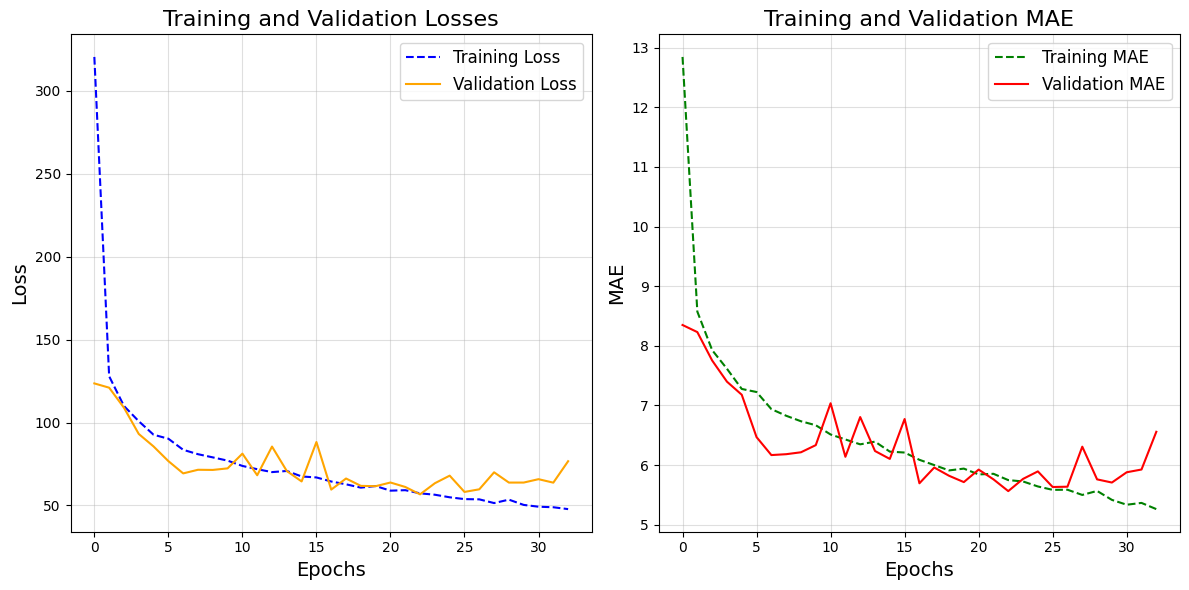

In [24]:
import numpy as np  # For numerical operations

num_epochs = 50
patience = 10 
best_val_mae = np.inf
patience_counter = 0

train_losses, val_losses = [], []
train_maes, val_maes = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, running_mae = 0.0, 0.0

    # Training phase
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        images = batch['image'].to(device)
        gender = batch['gender'].to(device)
        race = batch['race'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(images, gender, race)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        running_mae += torch.sum(torch.abs(outputs.squeeze() - labels.float())).item()

    train_loss = running_loss / len(train_loader.dataset)
    train_mae = running_mae / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_maes.append(train_mae)

    # Validation phase
    model.eval()
    val_loss, val_mae = 0.0, 0.0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
            images = batch['image'].to(device)
            gender = batch['gender'].to(device)
            race = batch['race'].to(device)
            labels = batch['label'].to(device)

            outputs = model(images, gender, race)
            loss = criterion(outputs.squeeze(), labels.float())

            val_loss += loss.item() * images.size(0)
            val_mae += torch.sum(torch.abs(outputs.squeeze() - labels.float())).item()

    val_loss /= len(val_loader.dataset)
    val_mae /= len(val_loader.dataset)
    val_losses.append(val_loss)
    val_maes.append(val_mae)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f} - Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}")

    # Early stopping logic
    if val_mae < best_val_mae:
        best_val_mae = val_mae
        patience_counter = 0  # Reset patience
        print(f"Validation MAE improved to {best_val_mae:.4f}. Saving model...")
        torch.save(model.state_dict(), 'best_model.pth')  # Save best model
    else:
        patience_counter += 1
        print(f"No improvement in MAE for {patience_counter} epoch(s).")

    if patience_counter >= patience:
        print(f"Early stopping triggered after {epoch+1} epochs.")
        break

# Plot training and validation metrics
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue', linestyle='--')
plt.plot(val_losses, label='Validation Loss', color='orange', linestyle='-')
plt.title('Training and Validation Losses', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(train_maes, label='Training MAE', color='green', linestyle='--')
plt.plot(val_maes, label='Validation MAE', color='red', linestyle='-')
plt.title('Training and Validation MAE', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()


In [28]:
# Load the saved model's state dict
model.load_state_dict(torch.load("best_model.pth"))
model.eval()  # Set the model to evaluation mode
print("Model loaded successfully")

Model loaded successfully


In [ ]:
model.eval()
test_loss, test_mae = 0.0, 0.0

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing on Test Dataset"):
        images = batch['image'].to(device)
        gender = batch['gender'].to(device)
        race = batch['race'].to(device)
        labels = batch['label'].to(device)

        # Forward pass
        outputs = model(images, gender, race)
        loss = criterion(outputs.squeeze(), labels.float())

        # Accumulate metrics
        test_loss += loss.item() * images.size(0)
        test_mae += torch.sum(torch.abs(outputs.squeeze() - labels.float())).item()

# Calculate average loss and MAE
test_loss /= len(test_loader.dataset)
test_mae /= len(test_loader.dataset)

print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")


Testing on Test Dataset: 100%|██████████| 65/65 [00:07<00:00,  8.74it/s]

Test Loss: 61.2834, Test MAE: 5.7602
